# Bismillahir Rahmaanir Raheem
# Almadadh Ya Gause RadiAllahu Ta'alah Anh - Ameen

# <font color=grey>Diabetes Machine Learning Models - Predict Amputation Complication - 2021</font>
<b>_by Zakia Salod_</b>

In [2]:
!pip install pycaret

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [4]:
pip install scikit-plot

In [5]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 166 kB/s 


In [72]:
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt # For graphical representations of the data
import seaborn as sns

In [118]:
dataset = pd.read_excel('amputation_dataset.xlsx')

In [79]:
dataset.head()

AGE GENDER    RACE   DIABETES_CLASS  AMPUTATION
0   73      M   Asian  Type 2 diabetes           0
1   79      F   Asian  Type 2 diabetes           0
2   59      M   Asian  Type 2 diabetes           0
3   76      F  Black   Type 2 diabetes           0
4   55      F  Black   Type 2 diabetes           0

In [116]:
!pip install imbalanced-learn

In [117]:
# check version number
import imblearn
print(imblearn.__version__)

0.7.0


In [119]:
print(dataset['AMPUTATION'].value_counts())

0    9354
1     136
Name: AMPUTATION, dtype: int64


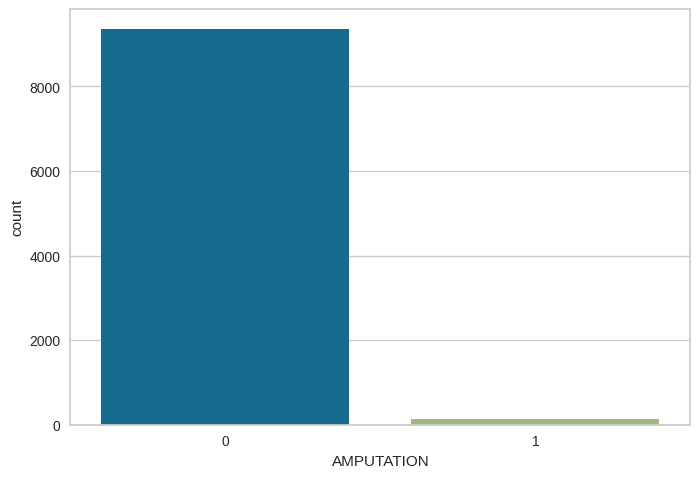

In [88]:
ax = sns.countplot(x="AMPUTATION", data=dataset)

Carrying out undersampling of the majority class (AMPUTATION=0) . . .

In [89]:
# Shuffle the Dataset.
shuffled_dataset = dataset.sample(frac=1, random_state=4)

In [91]:
# Put all the amputation class in a separate dataset.
amputation_dataset = shuffled_dataset.loc[shuffled_dataset['AMPUTATION'] == 1]

In [92]:
#Randomly select 136 observations from the non-amputation (majority class)
non_amputation_dataset = shuffled_dataset.loc[shuffled_dataset['AMPUTATION'] == 0].sample(n=136,random_state=42)

In [93]:
# Concatenate both dataframes again
normalized_dataset = pd.concat([amputation_dataset, non_amputation_dataset])

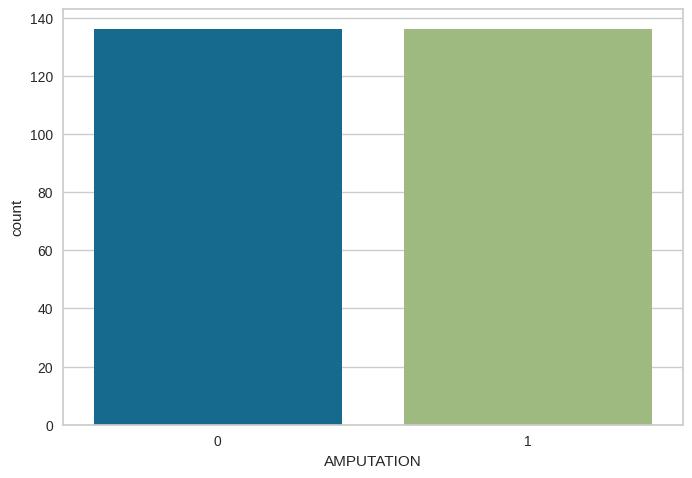

In [94]:
ax = sns.countplot(x="AMPUTATION", data=normalized_dataset)

In [96]:
my_report = sv.analyze(normalized_dataset)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [25]:
dummy_gender = pd.get_dummies(dataset['GENDER'])

In [26]:
dummy_gender.head()

F  M
0  0  1
1  1  0
2  0  1
3  1  0
4  1  0

In [27]:
dummy_race = pd.get_dummies(dataset['RACE'])

In [28]:
dummy_race.head()

Asian  Black   Coloured  Other  White
0      1       0         0      0      0
1      1       0         0      0      0
2      1       0         0      0      0
3      0       1         0      0      0
4      0       1         0      0      0

In [29]:
dummy_diabetes_class = pd.get_dummies(dataset['DIABETES_CLASS'])

In [30]:
dummy_diabetes_class.head()

Type 1 diabetes  Type 2 diabetes
0                0                1
1                0                1
2                0                1
3                0                1
4                0                1

In [31]:
dataset = pd.concat([dataset, dummy_gender], axis=1)
dataset.head()

AGE GENDER    RACE   DIABETES_CLASS  AMPUTATION  F  M
0   73      M   Asian  Type 2 diabetes           0  0  1
1   79      F   Asian  Type 2 diabetes           0  1  0
2   59      M   Asian  Type 2 diabetes           0  0  1
3   76      F  Black   Type 2 diabetes           0  1  0
4   55      F  Black   Type 2 diabetes           0  1  0

In [32]:
dataset = pd.concat([dataset, dummy_race], axis=1)
dataset.head()

AGE GENDER    RACE   DIABETES_CLASS  ...  Black   Coloured  Other  White
0   73      M   Asian  Type 2 diabetes  ...       0         0      0      0
1   79      F   Asian  Type 2 diabetes  ...       0         0      0      0
2   59      M   Asian  Type 2 diabetes  ...       0         0      0      0
3   76      F  Black   Type 2 diabetes  ...       1         0      0      0
4   55      F  Black   Type 2 diabetes  ...       1         0      0      0

[5 rows x 12 columns]

In [33]:
dataset = pd.concat([dataset, dummy_diabetes_class], axis=1)
dataset.head()

AGE GENDER    RACE  ... White  Type 1 diabetes  Type 2 diabetes
0   73      M   Asian  ...     0                0                1
1   79      F   Asian  ...     0                0                1
2   59      M   Asian  ...     0                0                1
3   76      F  Black   ...     0                0                1
4   55      F  Black   ...     0                0                1

[5 rows x 14 columns]

In [34]:
dataset.columns = dataset.columns.str.upper()
dataset.head()

AGE GENDER    RACE  ... WHITE  TYPE 1 DIABETES  TYPE 2 DIABETES
0   73      M   Asian  ...     0                0                1
1   79      F   Asian  ...     0                0                1
2   59      M   Asian  ...     0                0                1
3   76      F  Black   ...     0                0                1
4   55      F  Black   ...     0                0                1

[5 rows x 14 columns]

In [36]:
dataset = dataset.rename(columns={'F': 'GENDER_F', 'M': 'GENDER_M', 'ASIAN':'RACE_ASIAN', 'BLACK':'RACE_BLACK', 'COLOURED': 'RACE_COLOURED', 'OTHER': 'RACE_OTHER', 'WHITE': 'RACE_WHITE', 'TYPE 1 DIABETES': 'DIABETES_CLASS_TYPE1_DIABETES', 'TYPE 2 DIABETES': 'DIABETES_CLASS_TYPE2_DIABETES' })

In [37]:
dataset.head()

AGE GENDER  ... DIABETES_CLASS_TYPE1_DIABETES DIABETES_CLASS_TYPE2_DIABETES
0   73      M  ...                             0                             1
1   79      F  ...                             0                             1
2   59      M  ...                             0                             1
3   76      F  ...                             0                             1
4   55      F  ...                             0                             1

[5 rows x 14 columns]

In [38]:
dataset = dataset.drop(['GENDER'], axis=1)

In [39]:
dataset = dataset.drop(['RACE'], axis=1)

In [40]:
dataset = dataset.drop(['DIABETES_CLASS'], axis=1)

In [41]:
dataset.head()

AGE  ...  DIABETES_CLASS_TYPE2_DIABETES
0   73  ...                              1
1   79  ...                              1
2   59  ...                              1
3   76  ...                              1
4   55  ...                              1

[5 rows x 11 columns]

In [97]:
# Importing module  
from pycaret.classification import *

In [98]:
# Initializing setup 
# clf = setup(data = dataset, target = 'AMPUTATION', fix_imbalance = True, session_id = 42)
clf = setup(data = normalized_dataset, target = 'AMPUTATION', session_id = 42)

Description             Value
0                               session_id                42
1                                   Target        AMPUTATION
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (272, 5)
5                           Missing Values             False
6                         Numeric Features                 1
7                     Categorical Features                 3
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (190, 8)
12                    Transformed Test Set           (82, 8)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              80f5
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [99]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.5947  0.0000  0.5233  0.6264   
lda          Linear Discriminant Analysis    0.5947  0.6017  0.5233  0.6264   
lr                    Logistic Regression    0.5895  0.6128  0.5344  0.6116   
gbc          Gradient Boosting Classifier    0.5632  0.5533  0.5333  0.5359   
rf               Random Forest Classifier    0.5474  0.5622  0.5411  0.5142   
ada                  Ada Boost Classifier    0.5368  0.5400  0.4322  0.5452   
knn                K Neighbors Classifier    0.5316  0.5306  0.4367  0.5491   
nb                            Naive Bayes    0.5316  0.5417  0.1767  0.5062   
lightgbm  Light Gradient Boosting Machine    0.5263  0.5433  0.5000  0.5259   
dt               Decision Tree Classifier    0.5105  0.5167  0.4333  0.4946   
svm                   SVM - Linear Kernel    0.5105  0.0000  0.5667  0.3021   
et                 Extra Trees Classifier    0.5105  0.5239  0.4422  0.4817   
qda       Quadratic Discriminant Analysis    0.4895  0.5006  0.6244  0.5004   

              F1   Kappa     MCC  TT (Sec)  
ridge     0.5557  0.1913  0.2036     0.015  
lda       0.5557  0.1913  0.2036     0.015  
lr        0.5542  0.1815  0.1938     0.291  
gbc       0.5276  0.1231  0.1276     0.068  
rf        0.5235  0.0909  0.0926     0.464  
ada       0.4662  0.0655  0.0741     0.090  
knn       0.4786  0.0621  0.0704     0.118  
nb        0.2107  0.0284  0.0504     0.016  
lightgbm  0.5028  0.0526  0.0528     0.063  
dt        0.4543  0.0151  0.0179     0.015  
svm       0.3893  0.0265  0.0267     0.014  
et        0.4577  0.0135  0.0119     0.454  
qda       0.5187 -0.0086 -0.0125     0.016

In [100]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=42, solver='auto',
                tol=0.001)


In [101]:
ridge = create_model('ridge')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4737  0.0  0.5556  0.4545  0.5000 -0.0440 -0.0449
1       0.5263  0.0  0.3333  0.5000  0.4000  0.0339  0.0358
2       0.4211  0.0  0.4444  0.4000  0.4211 -0.1547 -0.1556
3       0.6842  0.0  0.5556  0.7143  0.6250  0.3596  0.3680
4       0.8421  0.0  0.7778  0.8750  0.8235  0.6816  0.6854
5       0.4211  0.0  0.4444  0.4000  0.4211 -0.1547 -0.1556
6       0.5789  0.0  0.6667  0.5455  0.6000  0.1648  0.1685
7       0.6316  0.0  0.5556  0.6250  0.5882  0.2570  0.2584
8       0.5789  0.0  0.3000  0.7500  0.4286  0.1828  0.2313
9       0.7895  0.0  0.6000  1.0000  0.7500  0.5870  0.6445
Mean    0.5947  0.0  0.5233  0.6264  0.5557  0.1913  0.2036
SD      0.1373  0.0  0.1388  0.1947  0.1404  0.2738  0.2840

In [102]:
ridge_tune = tune_model(ridge, optimize='auc')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5789  0.0  0.2222  0.6667  0.3333  0.1264  0.1674
1       0.5263  0.0  0.1111  0.5000  0.1818  0.0116  0.0181
2       0.4211  0.0  0.0000  0.0000  0.0000 -0.2081 -0.3254
3       0.5263  0.0  0.0000  0.0000  0.0000  0.0000  0.0000
4       0.5789  0.0  0.1111  1.0000  0.2000  0.1163  0.2485
5       0.5263  0.0  0.2222  0.5000  0.3077  0.0229  0.0272
6       0.5789  0.0  0.2222  0.6667  0.3333  0.1264  0.1674
7       0.5789  0.0  0.2222  0.6667  0.3333  0.1264  0.1674
8       0.5263  0.0  0.1000  1.0000  0.1818  0.0952  0.2236
9       0.6316  0.0  0.3000  1.0000  0.4615  0.2888  0.4108
Mean    0.5474  0.0  0.1511  0.6000  0.2333  0.0706  0.1105
SD      0.0537  0.0  0.0969  0.3512  0.1424  0.1217  0.1869

In [103]:
print(ridge_tune)

RidgeClassifier(alpha=9.44, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=42, solver='auto',
                tol=0.001)


In [105]:
plot_model(ridge_tune, plot='f1')

ValueError: ignored

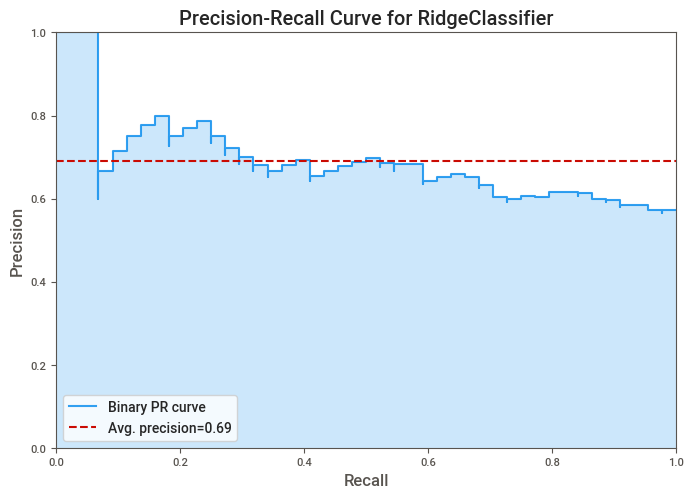

In [107]:
plot_model(ridge_tune, plot='pr')

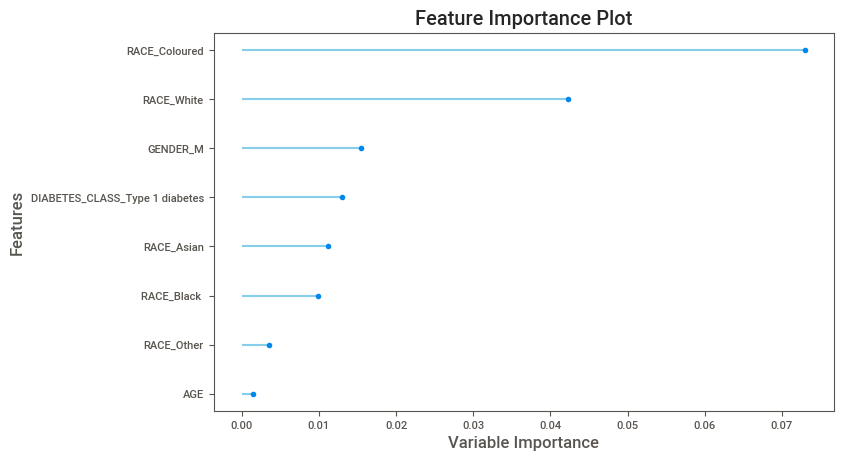

In [108]:
plot_model(ridge_tune, plot='feature')

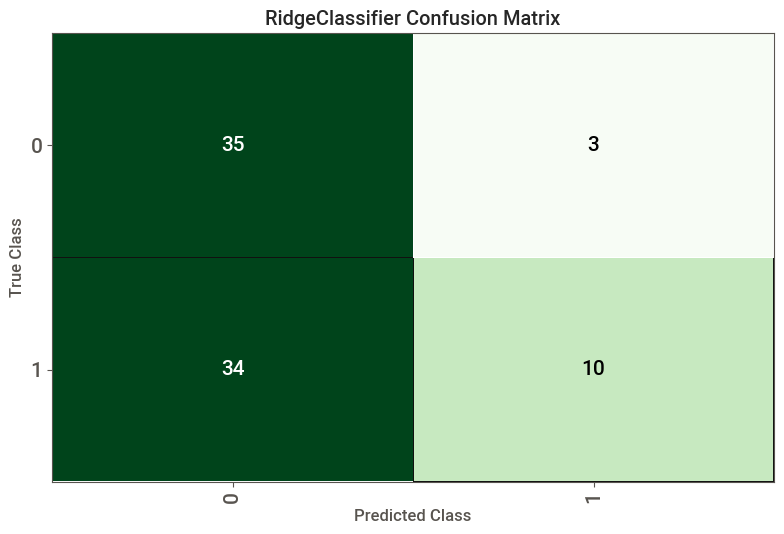

In [109]:
plot_model(ridge_tune, plot = 'confusion_matrix')

In [111]:
predict = predict_model(ridge_tune);

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0  Ridge Classifier    0.5488  0.5742  0.2273  0.7692  0.3509  0.1405  0.2025

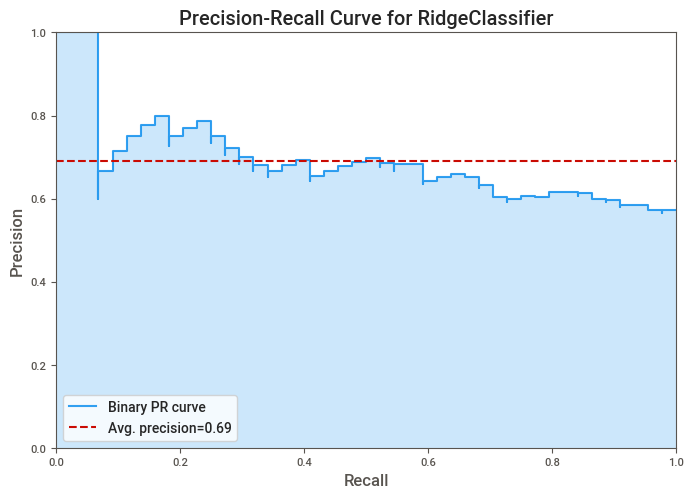

In [113]:
plot_model(ridge_tune, plot='pr')